### Student: Anthony Montoya-Olivas
### Q-Learning Agent
### Intro to AI
### https://gymnasium.farama.org/
### 3/23/2025

In [8]:
# import gymnasium as gym
# import ale_py

# gym.register_envs(ale_py)


# # Initialise the environment
# env = gym.make("ALE/Frogger-v5", render_mode="human")

# # Reset the environment to generate the first observation
# observation, info = env.reset(seed=42)
# episode_over = False
# while not episode_over:
#     action = env.action_space.sample()  # agent policy that uses the observation and info
#     observation, reward, terminated, truncated, info = env.step(action)

#     episode_over = terminated or truncated

# env.close()

In [16]:
# # Youtube example

# import pickle
# import gymnasium as gym
# import ale_py
# from matplotlib import pyplot as plt
# import numpy as np

# gym.register_envs(ale_py)

# def run(episodes, is_training=True, render=False):
#     # Initialise the environment
#     env = gym.make("ALE/Frogger-v5", render_mode="human" if render else None)
    
#     if(is_training):
#         q = np.zeros((env.observation_space, env.action_space))
#     else:
#         f = open('proj2-frogger.pkl','rb')
#         q = pickle.load(f)
#         f.close()

#     learning_rate_a = 0.9       # alpha or learning rate
#     discount_factor_g = 0.9     # gamma or discount rate

#     epsilon = 1     # 1 - 100% random actions
#     epsilon_decay_rate = 0.0001     # epsilon decay rate 1/0.0001 = 10000
#     rng = np.random.default_rng()   #random number generator

#     rewards_per_episode = np.zeros(episodes)
#     for i in range(episodes):

#         observation, info = env.reset(seed=42)
#         terminated = False
#         truncated = False
    

#         while(not terminated and not truncated):
#             if is_training and rng.random() < epsilon:
#                 action = env.action_space.sample() # actions: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
#             else:
#                 action = np.argmax(q[observation,:])

#             new_obs, reward, terminated, truncated, info = env.step(action)

#             if is_training:
#                 q[observation,action] = q[observation, action] + learning_rate_a * (reward + discount_factor_g * np.max(q[new_obs,action,:]) - q[observation,action])

#             observation = new_obs

#         epsilon = max(epsilon - epsilon_decay_rate, 0)

#         if(epsilon==0):
#             learning_rate_a = 0.0001

#         if reward == 1:
#             rewards_per_episode[i] = 1

#     env.close()

#     sum_rewards = np.zeros(episodes)
#     for t in range(episodes):
#         sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
#     plt.plot(sum_rewards)
#     plt.savefig('proj2-frogger.png')

#     if is_training:
#         f = open("proj2-frogger.pkl","wb")
#         pickle.dump(q,f)
#         f.close()

# if __name__ == '__main__':
#     run(15000, is_training=True)

In [17]:
# import gymnasium as gym
# import ale_py


# gym.register_envs(ale_py)

# env = gym.make("ALE/Frogger-v5", continuous=True)
# #q = np.zeros((env.observation_space, env.action_space))
# observation, info = env.reset(seed=42)

# action = env.action_space.sample()

# new_obs, reward, terminated, truncated, info = env.step(action)

# print("action_space:", env.action_space)
# print("action:", action)
# print("reward:",info)



In [18]:
# bins = np.array([10] * len(env.observation_space.low))  # 10 bins per dimension
# low, high = env.observation_space.low, env.observation_space.high
# q_table = np.zeros(tuple(bins) + (env.action_space.n,))

# for episode in range(episodes):
#     observation, _ = env.reset()
#     discrete_state = discretize_state(observation, bins, low, high)
#     terminated, truncated = False, False

#     while not (terminated or truncated):
#         if is_training and rng.random() < epsilon:
#             action = env.action_space.sample()
#         else:
#             action = np.argmax(q_table[discrete_state])

#         next_obs, reward, terminated, truncated, _ = env.step(action)
#         next_discrete_state = discretize_state(next_obs, bins, low, high)

#         # Q-learning Update
#         best_future_q = np.max(q_table[next_discrete_state])
#         q_table[discrete_state + (action,)] += learning_rate_a * (reward + discount_factor_g * best_future_q - q_table[discrete_state + (action,)])
        
#         discrete_state = next_discrete_state


# q_table = {}

# def discretize_state(observation, bins, low, high):
#     step = (high - low) / bins
#     return tuple(((observation - low) // step).astype(int))

# for episode in range(episodes):
#     observation, _ = env.reset()
#     discrete_state = discretize_state(observation, bins, low, high)
#     terminated, truncated = False, False

#     while not (terminated or truncated):
#         if rng.random() < epsilon:
#             action = env.action_space.sample()
#         else:
#             action = max(range(env.action_space.n), key=lambda a: get_q_value(discrete_state, a))

#         next_obs, reward, terminated, truncated, _ = env.step(action)
#         next_discrete_state = discretize_state(next_obs, bins, low, high)

#         best_next_q = max(get_q_value(next_discrete_state, a) for a in range(env.action_space.n))
#         new_q_value = (1 - learning_rate_a) * get_q_value(discrete_state, action) + learning_rate_a * (reward + discount_factor_g * best_next_q)
#         set_q_value(discrete_state, action, new_q_value)

#         discrete_state = next_discrete_state

## Inspiration from Youtube


In [11]:
# import pickle
# import gymnasium as gym
# import ale_py
# from matplotlib import pyplot as plt
# import numpy as np

# # these functions help be with the BOX observation space
# def discretize_state(observation, bins, low, high):
#     step = (high - low) / bins
#     return tuple(((observation - low) // step).astype(int))

# def preprocess_observation(obs):
#     # Convert the observation to grayscale and downsample
#     grayscale_obs = np.mean(obs, axis=2).astype(np.float32)  # Average over RGB channels
#     resized_obs = grayscale_obs[::2, ::2]  # Downsample by a factor of 2
#     return resized_obs.flatten()  # Flatten into a 1D array


# # need this for ale_py
# gym.register_envs(ale_py)

# def run(episodes, is_training=False, render=True):
#     # Initialise the environment
#     env = gym.make("ALE/Frogger-v5", render_mode="human" if render else None)
    
#     processed_obs_example = preprocess_observation(env.reset(seed=42)[0])  # Example observation
#     bins = np.full(processed_obs_example.shape, 10)
#     low = np.zeros_like(processed_obs_example)
#     high = np.full_like(processed_obs_example, 255)
#     if(is_training):
#         # Adjust bins, low, and high to match preprocessed observations
        
#         q = {}

#     else:
#         f = open('proj2-frogger.pkl','rb')
#         q = pickle.load(f)
#         f.close()

#     learning_rate_a = 0.9       # alpha or learning rate
#     discount_factor_g = 0.95     # gamma or discount rate

#     epsilon = 1     # 1 - 100% random actions
#     epsilon_decay_rate = 0.0001     # epsilon decay rate 1/0.0001 = 10000
#     rng = np.random.default_rng()   #random number generator

#     rewards_per_episode = np.zeros(episodes)
#     for i in range(episodes):

#         observation, info = env.reset(seed=42)
#         processed_obs = preprocess_observation(observation)
#         discrete_state = discretize_state(processed_obs, bins, low, high)
#         terminated = False
#         truncated = False
    

#         while(not terminated and not truncated):
#             if is_training and rng.random() < epsilon:
#                 action = env.action_space.sample() # actions: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
#             else:
#                 q_values = q.get(discrete_state, np.zeros(env.action_space.n))
#                 action = np.argmax(q_values)

#             new_obs, reward, terminated, truncated, info = env.step(action)
#             next_processed_obs = preprocess_observation(new_obs)
#             next_discrete_state = discretize_state(next_processed_obs, bins, low, high)

#             if is_training:
#                 if discrete_state not in q:
#                     q[discrete_state] = np.zeros(env.action_space.n)
#                 q[discrete_state][action] += learning_rate_a * (
#                     reward + discount_factor_g * np.max(q.get(next_discrete_state, np.zeros(env.action_space.n)))
#                     - q[discrete_state][action]
#                 )

#             discrete_state = next_discrete_state

#         epsilon = max(epsilon - epsilon_decay_rate, 0)

#         if(epsilon==0):
#             learning_rate_a = 0.0001

#         if reward == 1:
#             rewards_per_episode[i] = 1

#     env.close()

#     sum_rewards = np.zeros(episodes)
#     for t in range(episodes):
#         sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
#     plt.plot(sum_rewards)
#     plt.savefig('proj2-frogger.png')

#     if is_training:
#         f = open("proj2-frogger.pkl","wb")
#         pickle.dump(q,f)
#         f.close()

# if __name__ == '__main__':
#     run(10, is_training=False, render=True)

Now that it runs you have to figure out saving the training data and using that data to clear the game

check where the is_training is

it shouldn't train when is_training is false

In [12]:
# import pickle
# import gymnasium as gym
# import ale_py
# from matplotlib import pyplot as plt
# import numpy as np

# def discretize_state(observation, bins, low, high):
#     step = (high - low) / bins
#     return tuple(((observation - low) // step).astype(int))

# def preprocess_observation(obs):
#     grayscale_obs = np.mean(obs, axis=2).astype(np.float32)  # Average over RGB channels
#     resized_obs = grayscale_obs[::2, ::2]  # Downsample by a factor of 2
#     return resized_obs.flatten()

# gym.register_envs(ale_py)

# def run(episodes, is_training=False, render=True):
#     env = gym.make("ALE/Frogger-v5", render_mode="human" if render else None)
    
#     processed_obs_example = preprocess_observation(env.reset(seed=42)[0])  # Example observation
#     bins = np.full(processed_obs_example.shape, 10)
#     low = np.zeros_like(processed_obs_example)
#     high = np.full_like(processed_obs_example, 255)

#     if is_training:
#         q = {}  # Initialize empty Q-table
#     else:
#         with open('proj2-frogger.pkl', 'rb') as f:
#             q = pickle.load(f)  # Load pre-trained Q-table

#     learning_rate_a = 0.9
#     discount_factor_g = 0.95
#     epsilon = 1 if is_training else 0  # No exploration if not training
#     epsilon_decay_rate = 0.0001
#     rng = np.random.default_rng()

#     rewards_per_episode = np.zeros(episodes)
#     for i in range(episodes):
#         observation, info = env.reset()
#         processed_obs = preprocess_observation(observation)
#         discrete_state = discretize_state(processed_obs, bins, low, high)
#         terminated = False
#         truncated = False

#         while not terminated and not truncated:
#             if is_training and rng.random() < epsilon:
#                 action = env.action_space.sample()
#             else:
#                 q_values = q.get(discrete_state, np.zeros(env.action_space.n))
#                 action = np.argmax(q_values)

#             new_obs, reward, terminated, truncated, info = env.step(action)
#             next_processed_obs = preprocess_observation(new_obs)
#             next_discrete_state = discretize_state(next_processed_obs, bins, low, high)

#             if is_training:
#                 if discrete_state not in q:
#                     q[discrete_state] = np.zeros(env.action_space.n)
#                 q[discrete_state][action] += learning_rate_a * (
#                     reward + discount_factor_g * np.max(q.get(next_discrete_state, np.zeros(env.action_space.n)))
#                     - q[discrete_state][action]
#                 )

#             discrete_state = next_discrete_state

#         epsilon = max(epsilon - epsilon_decay_rate, 0)

#         if epsilon == 0:
#             learning_rate_a = 0.0001

#         if reward == 1:
#             rewards_per_episode[i] = 1

#     env.close()

#     sum_rewards = np.zeros(episodes)
#     for t in range(episodes):
#         sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
#     plt.plot(sum_rewards)
#     plt.savefig('proj2-frogger.png')

#     if is_training:
#         with open("proj2-frogger.pkl", "wb") as f:
#             pickle.dump(q, f)

# if __name__ == '__main__':
#     run(30, is_training=True, render=True)

In [13]:
# import numpy as np
# import gymnasium as gym
# import ale_py

# gym.register_envs(ale_py)
# # Initialize environment
# env = gym.make("ALE/Frogger-v5", render_mode="human")  # Replace with your environment
# state_bins = [10, 10, 10, 10]  # Example: Discretizing for a 4-dimensional state space
# state_low = env.observation_space.low
# state_high = env.observation_space.high

# # Initialize Q-table
# q_table = {}

# # Hyperparameters
# episodes = 10
# alpha = 0.1  # Learning rate
# gamma = 0.99  # Discount factor
# epsilon = 1.0  # Exploration rate
# epsilon_decay = 0.995
# min_epsilon = 0.01
# rewards_per_episode = []

# # Functions for state discretization
# def discretize_state(state):
#     """Discretize continuous state using bins."""
#     state_adj = (state - state_low) / (state_high - state_low)  # Normalize state to [0, 1]
#     discrete_state = (state_adj * state_bins).astype(int)  # Scale to bins
#     return tuple(discrete_state)

# # Initialize Q-table dynamically
# def get_q_values(state):
#     """Retrieve Q-values for a given state or initialize them."""
#     if state not in q_table:
#         q_table[state] = np.zeros(env.action_space.n)
#     return q_table[state]

# # Run single episode of Q-learning
# for episode in range(episodes):
#     state, _ = env.reset()
#     state_discrete = discretize_state(state)
#     done = False
#     total_reward = 0

#     while not done:
#         # Epsilon-greedy action selection
#         if np.random.random() < epsilon:
#             action = env.action_space.sample()  # Explore
#         else:
#             action = np.argmax(get_q_values(state_discrete))  # Exploit

#         # Take action, observe next state and reward
#         next_state, reward, terminated, truncated, _ = env.step(action)
#         next_state_discrete = discretize_state(next_state)
#         done = terminated or truncated
#         total_reward += reward

#         # Update Q-value using Q-learning update formula
#         current_q = get_q_values(state_discrete)[action]
#         max_next_q = np.max(get_q_values(next_state_discrete))  # Max Q-value for next state
#         new_q = current_q + alpha * (reward + gamma * max_next_q - current_q)  # Update rule
#         q_table[state_discrete][action] = new_q

#         # Move to the next state
#         state_discrete = next_state_discrete

#     rewards_per_episode.append(total_reward)
#     # Decay epsilon
#     epsilon = max(min_epsilon, epsilon * epsilon_decay)
# env.close()

# import matplotlib.pyplot as plt
# plt.plot(rewards_per_episode)
# plt.xlabel('Episodes')
# plt.ylabel('Total Reward')
# plt.title('Performance Over Time')
# plt.show()


---

---

---

# 1) Q-Learning
---

In [1]:
import gymnasium as gym
import numpy as np
from matplotlib import pyplot as plt
import ale_py

gym.register_envs(ale_py)

# Preprocess observations for Box observation space
def preprocess_observation(obs):
    """Convert RGB observation to a lower-dimensional grayscale representation."""
    # Convert to grayscale
    grayscale_obs = np.mean(obs, axis=2).astype(np.float32)
    # Downsample (reduce resolution)
    resized_obs = grayscale_obs[::4, ::4]  # Scale down to 1/4th of the size
    # Normalize to range [0, 1]
    normalized_obs = resized_obs / 255.0
    return normalized_obs.flatten()

# Discretize the preprocessed state
def discretize_state(state, bins):
    """Map continuous preprocessed state to discrete bins."""
    discrete_state = np.digitize(state, bins) - 1  # Bin indices start at 0
    return tuple(discrete_state)

def run(episodes, is_training=True, render=False):
    # Initialize the environment
    env = gym.make("ALE/Frogger-v5", render_mode="human" if render else None)

    # Set up bins for discretization
    example_obs = preprocess_observation(env.reset()[0])  # Example observation
    num_bins = 10  # Number of bins for discretization
    bins = np.linspace(0, 1, num_bins)  # Bins for normalized states

    # Initialize Q-table
    q_table = {}

    # Hyperparameters
    learning_rate_a = 0.2
    discount_factor_g = 0.99
    epsilon = 1.0 if is_training else 0.0  # No exploration if not training
    epsilon_decay_rate = 0.0995
    rng = np.random.default_rng()

    rewards_per_episode = []

    for i in range(episodes):
        # Reset the environment and preprocess the initial state
        if i % 10 == 0:
            print("Episode: ", i)

        observation, _ = env.reset()
        preprocessed_obs = preprocess_observation(observation)
        state_discrete = discretize_state(preprocessed_obs, bins)

        terminated, truncated = False, False
        total_reward = 0

        while not terminated and not truncated:
            # Epsilon-greedy action selection
            if rng.random() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table.get(state_discrete, np.zeros(env.action_space.n)))  # Exploit

            # Take the action and observe the result
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_preprocessed_obs = preprocess_observation(next_obs)
            next_state_discrete = discretize_state(next_preprocessed_obs, bins)

            # Update Q-table
            if state_discrete not in q_table:
                q_table[state_discrete] = np.zeros(env.action_space.n)
            if next_state_discrete not in q_table:
                q_table[next_state_discrete] = np.zeros(env.action_space.n)

            current_q = q_table[state_discrete][action]
            max_next_q = np.max(q_table[next_state_discrete])
            new_q = current_q + learning_rate_a * (reward + discount_factor_g * max_next_q - current_q)
            q_table[state_discrete][action] = new_q

            # Move to the next state
            state_discrete = next_state_discrete
            total_reward += reward

        # Decay epsilon after each episode
        epsilon = max(epsilon - epsilon_decay_rate, 0.01)
        rewards_per_episode.append(total_reward)

    env.close()

    # Plot total rewards over episodes
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Performance Over Time')
    plt.show()

if __name__ == '__main__':
    run(500, is_training=True, render=True)

Episode:  0


: 

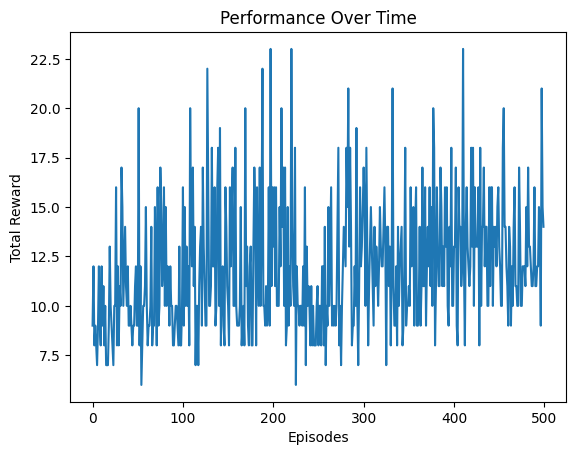

In [3]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random
from matplotlib import pyplot as plt
import ale_py

gym.register_envs(ale_py)


# Neural network for approximating Q-values
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Preprocess observations
def preprocess_observation(obs):
    grayscale_obs = np.mean(obs, axis=2).astype(np.float32)  # Convert to grayscale
    resized_obs = grayscale_obs[::4, ::4]  # Downsample by factor of 4
    normalized_obs = resized_obs / 255.0  # Normalize pixel values to [0, 1]
    return normalized_obs.flatten()

# Deep Q-Learning training function
def train_dqn(env, episodes=500, batch_size=64, gamma=0.95, lr=1e-3, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.995):
    # Initialize environment and parameters
    input_dim = preprocess_observation(env.reset()[0]).shape[0]
    output_dim = env.action_space.n
    q_net = QNetwork(input_dim, output_dim)
    target_net = QNetwork(input_dim, output_dim)
    target_net.load_state_dict(q_net.state_dict())  # Synchronize weights
    target_net.eval()
    optimizer = optim.Adam(q_net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    replay_buffer = deque(maxlen=10000)

    epsilon = epsilon_start
    rewards_per_episode = []

    for episode in range(episodes):
        state = preprocess_observation(env.reset()[0])
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                with torch.no_grad():
                    state_tensor = torch.tensor(state, dtype=torch.float32)
                    action = torch.argmax(q_net(state_tensor)).item()  # Exploit

            # Take action and observe results
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = preprocess_observation(next_obs)
            done = terminated or truncated
            total_reward += reward

            # Store experience in replay buffer
            replay_buffer.append((state, action, reward, next_state, done))
            state = next_state

            # Train the network if enough experiences are stored
            if len(replay_buffer) >= batch_size:
                minibatch = random.sample(replay_buffer, batch_size)
                states, actions, rewards, next_states, dones = zip(*minibatch)

                # states_tensor = torch.tensor(states, dtype=torch.float32)
                # actions_tensor = torch.tensor(actions, dtype=torch.long)
                # rewards_tensor = torch.tensor(rewards, dtype=torch.float32)
                # next_states_tensor = torch.tensor(next_states, dtype=torch.float32)
                # dones_tensor = torch.tensor(dones, dtype=torch.float32)

                # Efficiently convert the list of NumPy arrays to a single NumPy array, then to a tensor
                states_tensor = torch.tensor(np.array(states), dtype=torch.float32)
                actions_tensor = torch.tensor(actions, dtype=torch.long)
                rewards_tensor = torch.tensor(rewards, dtype=torch.float32)
                next_states_tensor = torch.tensor(np.array(next_states), dtype=torch.float32)
                dones_tensor = torch.tensor(dones, dtype=torch.float32)

                # Compute Q-values and targets
                q_values = q_net(states_tensor).gather(1, actions_tensor.unsqueeze(1)).squeeze(1)
                with torch.no_grad():
                    max_next_q_values = target_net(next_states_tensor).max(1)[0]
                    targets = rewards_tensor + gamma * max_next_q_values * (1 - dones_tensor)

                # Compute loss and update Q-network
                loss = loss_fn(q_values, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # Update target network every few episodes
        if episode % 10 == 0:
            target_net.load_state_dict(q_net.state_dict())

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

        # Track total reward
        rewards_per_episode.append(total_reward)

    # Plot rewards over episodes
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Performance Over Time')
    plt.show()

if __name__ == '__main__':
    env = gym.make("ALE/Frogger-v5")
    train_dqn(env, episodes=500)

# 2) d q-learning
---

In [1]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random
from matplotlib import pyplot as plt
import ale_py

gym.register_envs(ale_py)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural network for approximating Q-values
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Preprocess observations
def preprocess_observation(obs):
    obs = torch.tensor(obs, dtype=torch.float32)
    obs = torch.mean(obs, dim=2)  # Convert to grayscale
    obs = obs[::4, ::4]  # Downsample by factor of 4
    obs /= 255.0  # Normalize pixel values to [0, 1]
    return obs.flatten()

# Deep Q-Learning class with optimize function
class DQNAgent:
    def __init__(self, input_dim, output_dim, discount_factor=0.99, lr=1e-3, enable_double_dqn=True):
        self.policy_dqn = QNetwork(input_dim, output_dim).to(device)
        self.target_dqn = QNetwork(input_dim, output_dim).to(device)
        self.target_dqn.load_state_dict(self.policy_dqn.state_dict())
        self.target_dqn.eval()
        self.optimizer = optim.Adam(self.policy_dqn.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()
        self.discount_factor_g = discount_factor
        self.enable_double_dqn = enable_double_dqn

    def optimize(self, mini_batch):
        # Transpose the list of experiences and separate each element
        states, actions, new_states, rewards, terminations = zip(*mini_batch)

        # Stack tensors to create batch tensors
        states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in states]).to(device)
        actions = torch.tensor(actions, dtype=torch.long).to(device)
        new_states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in new_states]).to(device)
        rewards = torch.tensor(rewards, dtype=torch.float32).to(device)
        terminations = torch.tensor(terminations, dtype=torch.float32).to(device)

        with torch.no_grad():
            if self.enable_double_dqn:
                # Get the best actions for new states from the policy network
                best_actions_from_policy = self.policy_dqn(new_states).argmax(dim=1, keepdim=True)

                # Compute target Q-values using the target network
                target_q = rewards + (1 - terminations) * self.discount_factor_g * \
                           self.target_dqn(new_states).gather(dim=1, index=best_actions_from_policy).squeeze()
            else:
                # Compute target Q-values without Double DQN
                target_q = rewards + (1 - terminations) * self.discount_factor_g * \
                           self.target_dqn(new_states).max(dim=1)[0]

        # Calculate Q-values from the policy network
        current_q = self.policy_dqn(states).gather(dim=1, index=actions.unsqueeze(dim=1)).squeeze()

        # Compute loss
        loss = self.loss_fn(current_q, target_q)

        # Optimize the model (backpropagation)
        self.optimizer.zero_grad()  # Clear gradients
        loss.backward()             # Compute gradients
        torch.nn.utils.clip_grad_norm_(self.policy_dqn.parameters(), max_norm=1.0)  # Optional: Gradient clipping
        self.optimizer.step()       # Update network parameters

# Training function
def train_dqn(env, episodes=500, batch_size=64, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.0995):
    # Initialize environment and DQN agent
    input_dim = preprocess_observation(env.reset()[0]).shape[0]
    output_dim = env.action_space.n
    agent = DQNAgent(input_dim, output_dim)
    replay_buffer = deque(maxlen=10000)
    epsilon = epsilon_start
    rewards_per_episode = []

    for episode in range(episodes):
        state = preprocess_observation(env.reset()[0])
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                with torch.no_grad():
                    state_tensor = torch.tensor(state, dtype=torch.float32).to(device)
                    action = torch.argmax(agent.policy_dqn(state_tensor)).item()  # Exploit

            # Take action and observe results
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = preprocess_observation(next_obs)
            done = terminated or truncated
            total_reward += reward

            # Store experience in replay buffer
            replay_buffer.append((state, action, next_state, reward, done))
            state = next_state

            # Train the network if enough experiences are stored
            if len(replay_buffer) >= batch_size:
                minibatch = random.sample(replay_buffer, batch_size)
                agent.optimize(minibatch)

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

        # Track total reward
        rewards_per_episode.append(total_reward)

        # Update target network every few episodes
        if episode % 10 == 0:
            agent.target_dqn.load_state_dict(agent.policy_dqn.state_dict())

        # Log progress
        if episode % 10 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

    # Plot rewards over episodes
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Performance Over Time')
    plt.show()

if __name__ == '__main__':
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    train_dqn(env, episodes=500)

C:\Users\amont\AppData\Local\Temp\ipykernel_21428\3984006312.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in states]).to(device)
C:\Users\amont\AppData\Local\Temp\ipykernel_21428\3984006312.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in new_states]).to(device)


Episode 0, Total Reward: 10.0, Epsilon: 0.0995


C:\Users\amont\AppData\Local\Temp\ipykernel_21428\3984006312.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).to(device)


: 

# Render after 450
---

Episodes: 0
Episodes: 10
Episodes: 20
Episodes: 30
Episodes: 40
Episodes: 50
Episodes: 60
Episodes: 70
Episodes: 80
Episodes: 90
Episodes: 100
Episodes: 110
Episodes: 120
Episodes: 130
Episodes: 140
Episodes: 150
Episodes: 160
Episodes: 170
Episodes: 180
Episodes: 190
Episodes: 200
Episodes: 210
Episodes: 220
Episodes: 230
Episodes: 240
Episodes: 250
Episodes: 260
Episodes: 270
Episodes: 280
Episodes: 290
Episodes: 300
Episodes: 310
Episodes: 320
Episodes: 330
Episodes: 340
Episodes: 350
Episodes: 360
Episodes: 370
Episodes: 380
Episodes: 390
Episodes: 400
Episodes: 410
Episodes: 420
Episodes: 430
Episodes: 440
Episodes: 450
Episodes: 460
Episodes: 470
Episodes: 480
Episodes: 490


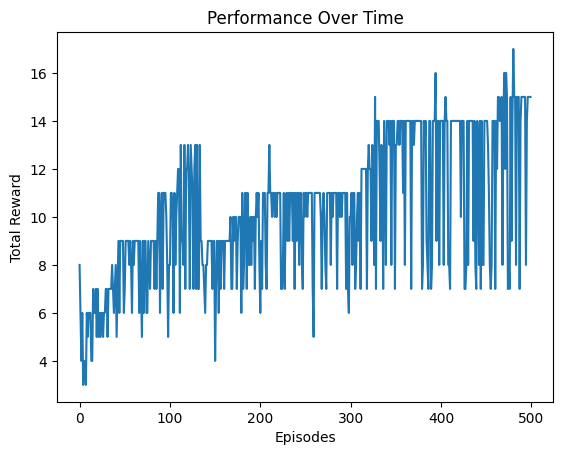

In [2]:


import gymnasium as gym
import numpy as np
from matplotlib import pyplot as plt
import ale_py

gym.register_envs(ale_py)

# Preprocess observations for Box observation space
def preprocess_observation(obs):
    """Convert RGB observation to a lower-dimensional grayscale representation."""
    # Convert to grayscale
    grayscale_obs = np.mean(obs, axis=2).astype(np.float32)
    # Downsample (reduce resolution)
    resized_obs = grayscale_obs[::4, ::4]  # Scale down to 1/4th of the size
    # Normalize to range [0, 1]
    normalized_obs = resized_obs / 255.0
    return normalized_obs.flatten()

# Discretize the preprocessed state
def discretize_state(state, bins):
    """Map continuous preprocessed state to discrete bins."""
    discrete_state = np.digitize(state, bins) - 1  # Bin indices start at 0
    return tuple(discrete_state)

def run(episodes, is_training=True):
    # Initialize the environment
    env = None

    # Set up bins for discretization
    example_obs = preprocess_observation(gym.make("ALE/Frogger-v5").reset()[0])  # Example observation
    num_bins = 10  # Number of bins for discretization
    bins = np.linspace(0, 1, num_bins)  # Bins for normalized states

    # Initialize Q-table
    q_table = {}

    # Hyperparameters
    learning_rate_a = 0.2
    discount_factor_g = 0.99
    epsilon = 1.0 if is_training else 0.0  # No exploration if not training
    epsilon_decay_rate = 0.0995
    rng = np.random.default_rng()

    rewards_per_episode = []

    for i in range(episodes):
        # Dynamically set render mode based on the episode number
        if i % 10 == 0:
            print("Episodes:", i)

        if i == 490:
            if env is not None:
                env.close()  # Close the existing environment
            env = gym.make("ALE/Frogger-v5", render_mode="human")
        elif i == 0:
            env = gym.make("ALE/Frogger-v5", render_mode=None)

        # Reset the environment and preprocess the initial state
        observation, _ = env.reset()
        preprocessed_obs = preprocess_observation(observation)
        state_discrete = discretize_state(preprocessed_obs, bins)

        terminated, truncated = False, False
        total_reward = 0

        while not terminated and not truncated:
            # Epsilon-greedy action selection
            if rng.random() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table.get(state_discrete, np.zeros(env.action_space.n)))  # Exploit

            # Take the action and observe the result
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_preprocessed_obs = preprocess_observation(next_obs)
            next_state_discrete = discretize_state(next_preprocessed_obs, bins)

            # Update Q-table
            if state_discrete not in q_table:
                q_table[state_discrete] = np.zeros(env.action_space.n)
            if next_state_discrete not in q_table:
                q_table[next_state_discrete] = np.zeros(env.action_space.n)

            current_q = q_table[state_discrete][action]
            max_next_q = np.max(q_table[next_state_discrete])
            new_q = current_q + learning_rate_a * (reward + discount_factor_g * max_next_q - current_q)
            q_table[state_discrete][action] = new_q

            # Move to the next state
            state_discrete = next_state_discrete
            total_reward += reward

        # Decay epsilon after each episode
        epsilon = max(epsilon * epsilon_decay_rate, 0.01)
        rewards_per_episode.append(total_reward)

    env.close()

    # Plot total rewards over episodes
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Performance Over Time')
    plt.show()

if __name__ == '__main__':
    run(500, is_training=True)



# Render after 450 for d q-Learning
---

C:\Users\amont\AppData\Local\Temp\ipykernel_8488\3395885478.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in states]).to(device)
C:\Users\amont\AppData\Local\Temp\ipykernel_8488\3395885478.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in new_states]).to(device)


Episode 0, Total Reward: 8.0, Epsilon: 0.9950


C:\Users\amont\AppData\Local\Temp\ipykernel_8488\3395885478.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_tensor = torch.tensor(state, dtype=torch.float32).to(device)


Episode 10, Total Reward: 10.0, Epsilon: 0.9464
Episode 20, Total Reward: 10.0, Epsilon: 0.9001
Episode 30, Total Reward: 9.0, Epsilon: 0.8561
Episode 40, Total Reward: 10.0, Epsilon: 0.8142
Episode 50, Total Reward: 10.0, Epsilon: 0.7744
Episode 60, Total Reward: 6.0, Epsilon: 0.7366
Episode 70, Total Reward: 9.0, Epsilon: 0.7005
Episode 80, Total Reward: 11.0, Epsilon: 0.6663
Episode 90, Total Reward: 15.0, Epsilon: 0.6337
Episode 100, Total Reward: 10.0, Epsilon: 0.6027
Episode 110, Total Reward: 15.0, Epsilon: 0.5733
Episode 120, Total Reward: 10.0, Epsilon: 0.5452
Episode 130, Total Reward: 11.0, Epsilon: 0.5186
Episode 140, Total Reward: 19.0, Epsilon: 0.4932
Episode 150, Total Reward: 10.0, Epsilon: 0.4691
Episode 160, Total Reward: 9.0, Epsilon: 0.4462
Episode 170, Total Reward: 13.0, Epsilon: 0.4244
Episode 180, Total Reward: 18.0, Epsilon: 0.4036
Episode 190, Total Reward: 12.0, Epsilon: 0.3839
Episode 200, Total Reward: 14.0, Epsilon: 0.3651
Episode 210, Total Reward: 12.0, 

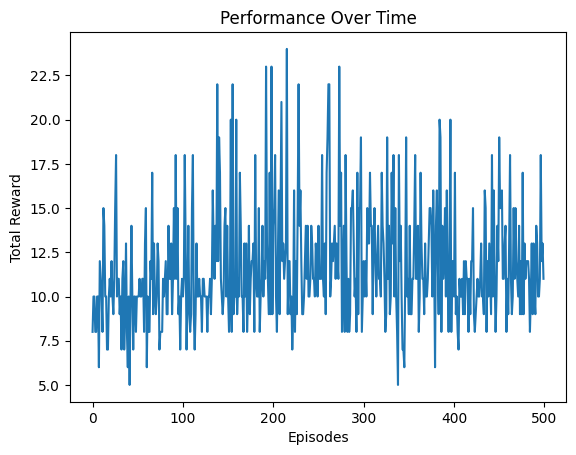

In [4]:
## Redender after 450 for d q-Learning

import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import random
from matplotlib import pyplot as plt
import ale_py

gym.register_envs(ale_py)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural network for approximating Q-values
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Preprocess observations
def preprocess_observation(obs):
    obs = torch.tensor(obs, dtype=torch.float32)
    obs = torch.mean(obs, dim=2)  # Convert to grayscale
    obs = obs[::4, ::4]  # Downsample by factor of 4
    obs /= 255.0  # Normalize pixel values to [0, 1]
    return obs.flatten()

# Deep Q-Learning class with optimize function
class DQNAgent:
    def __init__(self, input_dim, output_dim, discount_factor=0.99, lr=1e-3, enable_double_dqn=True):
        self.policy_dqn = QNetwork(input_dim, output_dim).to(device)
        self.target_dqn = QNetwork(input_dim, output_dim).to(device)
        self.target_dqn.load_state_dict(self.policy_dqn.state_dict())
        self.target_dqn.eval()
        self.optimizer = optim.Adam(self.policy_dqn.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()
        self.discount_factor_g = discount_factor
        self.enable_double_dqn = enable_double_dqn

    def optimize(self, mini_batch):
        # Transpose the list of experiences and separate each element
        states, actions, new_states, rewards, terminations = zip(*mini_batch)

        # Stack tensors to create batch tensors
        states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in states]).to(device)
        actions = torch.tensor(actions, dtype=torch.long).to(device)
        new_states = torch.stack([torch.tensor(s, dtype=torch.float32) for s in new_states]).to(device)
        rewards = torch.tensor(rewards, dtype=torch.float32).to(device)
        terminations = torch.tensor(terminations, dtype=torch.float32).to(device)

        with torch.no_grad():
            if self.enable_double_dqn:
                # Get the best actions for new states from the policy network
                best_actions_from_policy = self.policy_dqn(new_states).argmax(dim=1, keepdim=True)

                # Compute target Q-values using the target network
                target_q = rewards + (1 - terminations) * self.discount_factor_g * \
                           self.target_dqn(new_states).gather(dim=1, index=best_actions_from_policy).squeeze()
            else:
                # Compute target Q-values without Double DQN
                target_q = rewards + (1 - terminations) * self.discount_factor_g * \
                           self.target_dqn(new_states).max(dim=1)[0]

        # Calculate Q-values from the policy network
        current_q = self.policy_dqn(states).gather(dim=1, index=actions.unsqueeze(dim=1)).squeeze()

        # Compute loss
        loss = self.loss_fn(current_q, target_q)

        # Optimize the model (backpropagation)
        self.optimizer.zero_grad()  # Clear gradients
        loss.backward()             # Compute gradients
        torch.nn.utils.clip_grad_norm_(self.policy_dqn.parameters(), max_norm=1.0)  # Optional: Gradient clipping
        self.optimizer.step()       # Update network parameters

# Training function
def train_dqn(episodes=500, batch_size=64, epsilon_start=1.0, epsilon_min=0.01, epsilon_decay=0.995):
    # Initialize variables
    env = gym.make("ALE/Frogger-v5", render_mode=None)  # Start without rendering
    input_dim = preprocess_observation(env.reset()[0]).shape[0]
    output_dim = env.action_space.n
    agent = DQNAgent(input_dim, output_dim)
    replay_buffer = deque(maxlen=10000)
    epsilon = epsilon_start
    rewards_per_episode = []

    for episode in range(episodes):
        # Dynamically enable rendering at episode 450
        if episode == 490:
            env.close()  # Close the current environment
            env = gym.make("ALE/Frogger-v5", render_mode="human")  # Enable rendering

        state = preprocess_observation(env.reset()[0])
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                with torch.no_grad():
                    state_tensor = torch.tensor(state, dtype=torch.float32).to(device)
                    action = torch.argmax(agent.policy_dqn(state_tensor)).item()  # Exploit

            # Take action and observe results
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = preprocess_observation(next_obs)
            done = terminated or truncated
            total_reward += reward

            # Store experience in replay buffer
            replay_buffer.append((state, action, next_state, reward, done))
            state = next_state

            # Train the network if enough experiences are stored
            if len(replay_buffer) >= batch_size:
                minibatch = random.sample(replay_buffer, batch_size)
                agent.optimize(minibatch)

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

        # Track total reward
        rewards_per_episode.append(total_reward)

        # Update target network every few episodes
        if episode % 10 == 0:
            agent.target_dqn.load_state_dict(agent.policy_dqn.state_dict())

        # Log progress
        if episode % 10 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

    # Clean up the environment
    env.close()

    # Plot rewards over episodes
    plt.plot(rewards_per_episode)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Performance Over Time')
    plt.show()


if __name__ == '__main__':
    train_dqn(episodes=500)

---

---

---